In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train_bikes.csv', parse_dates = ['datetime'])

The total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Checking for any missing values

In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# Minimum value for each column
df.min()

datetime      2011-01-01 00:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                         0.82
atemp                        0.76
humidity                        0
windspeed                       0
casual                          0
registered                      0
count                           1
dtype: object

# Splittine datetime into Day, Month, hour

In [7]:
df['Day'] = df['datetime'].dt.day
df['Month'] = df['datetime'].dt.month
df['Hour'] = df['datetime'].dt.hour
#df['Journey_year'] = df['Date_of_Journey'].dt.year
df.drop(['datetime'], axis = 1, inplace=True)

In [8]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Day,Month,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


# Analysis of count based on Humidity and windspeed

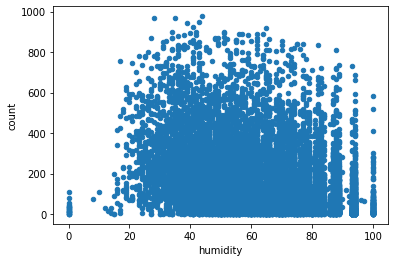

In [9]:
df.plot.scatter('humidity', 'count')
plt.show()

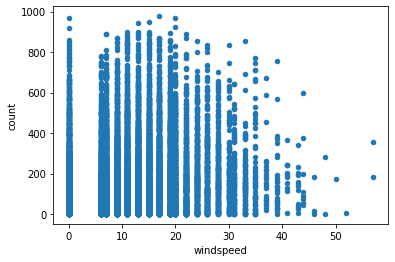

In [10]:
df.plot.scatter('windspeed', 'count')
plt.show()

From the above scatter plots, we can analysis following things.

1. The distribution of humidity is more between 20-80.
2. Count reaches maximum for these ranges. Whereas for humidity 0 and 100, count max is around 200 and 600.
3. The count is max for almost all wind speed expect for high wind speeds.


# Count based on day and month

Month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


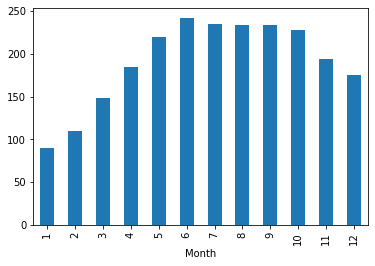

In [11]:
data2 = df.groupby('Month')['count'].mean()
print(data2)
data2.plot.bar()
plt.show()

We can see that for the month of June, the count is maximum with a value of 242. Lets explore the count on June month.

Day
1     168.770833
2     272.666667
3     269.854167
4     257.083333
5     248.062500
6     241.729167
7     256.812500
8     252.854167
9     237.770833
10    233.000000
11    242.291667
12    196.500000
13    259.187500
14    255.291667
15    267.604167
16    238.937500
17    246.291667
18    212.875000
19    241.020833
Name: count, dtype: float64


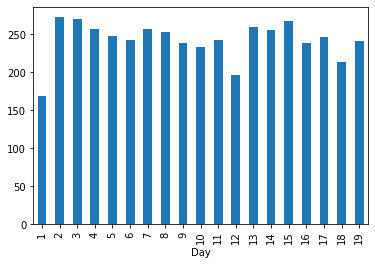

In [12]:
data_june = df[df['Month'] == 6]
day = data_june.groupby('Day')['count'].mean()
print(day)
day.plot.bar()
plt.show()

We can see that for June month, the count is max for 2nd day. 

# Count based on each hour

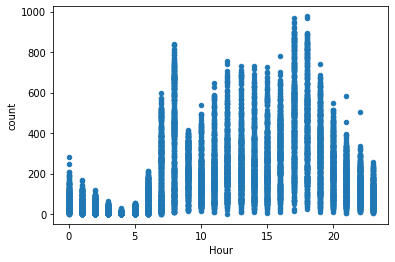

In [13]:
data4 = df.groupby('Hour')['count'].mean()
df.plot.scatter('Hour', 'count')
plt.show()

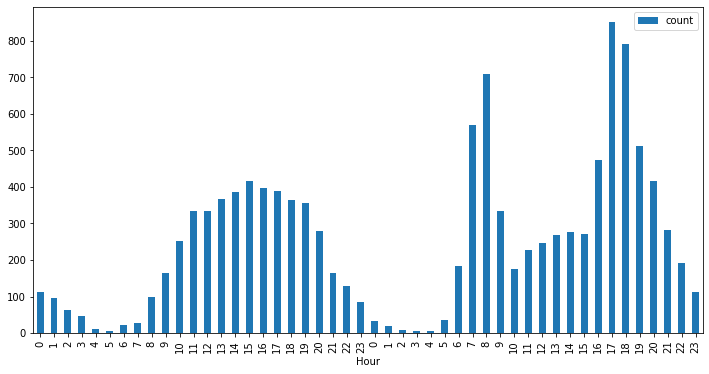

In [14]:
data = df[(df['Month']==6) & (df['Day']==5)]
data.plot.bar('Hour', 'count', figsize = (12, 6))
plt.show()

The bar plot shows the filtered data for June 5th. On June 5th, we can see that on 17:00 clock, max amount of cycles have been rented.

# Count based on season and holiday

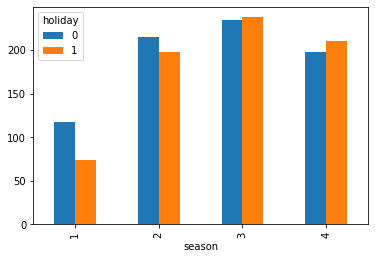

In [15]:
data3 = df.groupby(['season', 'holiday'])['count'].mean()
data3.unstack().plot.bar()
plt.show()

the above bar plot is distinguished between sesons and count. For each season, holiday or not is present. 

1. The count of bikes for season 3 with holiday is the most followed by without.
2. The least count of bikes in on season 1 with holiday.

#Based on Temp and atemp

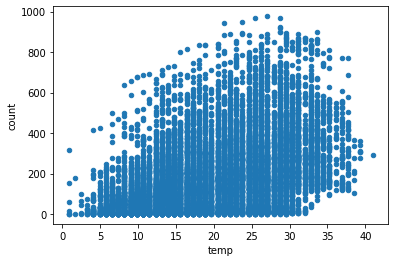

In [16]:
df.plot.scatter('temp', 'count')
plt.show()

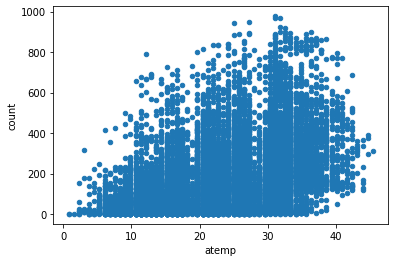

In [17]:
df.plot.scatter('atemp', 'count')
plt.show()

# Correlation matrix

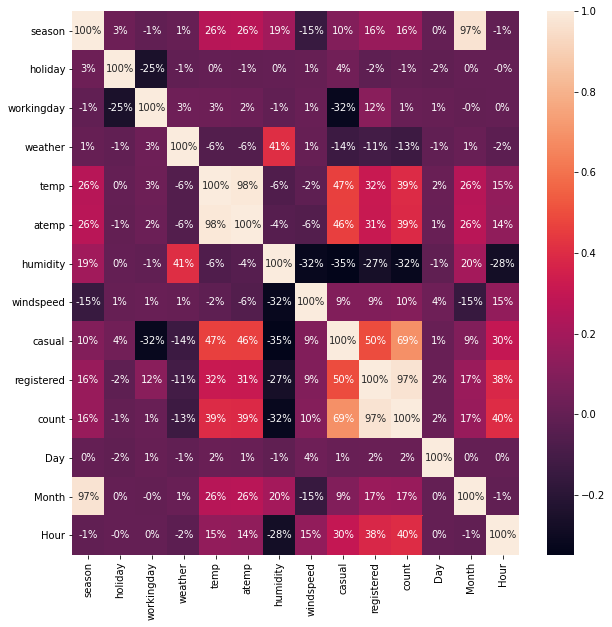

In [18]:
# Co-relation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')
plt.show()

The correlation matrix provides the relation between two variables.

1. We can see that, the humidity and count are in a correlation of -32% which means that as the humidity increases, the count decreases by 32%.

2. The weather and humidity has a correlation of 41%. This means as weather incrases, humidity increases by 41% and vice-versa.

# Conclusion

1. The dataset predict the amount of bike rentals based on various parameters.
2. The rental bike count is analysed based on Month, day and hourly basis.
3. The dataset is analysed based on variables like weather, temperature, humidity.
4. The analysis using correlation is done.